# Proyek Analisis Data: Bike-sharing-dataset
- Nama: Andi Engku Putribuana
- Email: andiengku1922@gmail.com
- Id Dicoding: putribuana

##About Dataset

>Dataset yang digunakan adalah Bike Sharing Dataset. Data ini terdiri dari dua file yaitu day.csv dan hour.csv. Masing-masing dari data csv ini dilakukan analisis untuk mengungkap tren dan pola pada data peminjaman sepeda.



##List Pertanyaan

> 1. Bagaimana distribusi peminjaman sepeda perbulan?
> 2. Bagaimana rata-rata peminjaman sepeda per hari dalam sebulan?
> 3. Bagaimana rata-rata total peminjaman sepeda berdasarkan cuaca?
> 4. Bagaimana rata-rata peminjaman sepeda?
> 5. Bagaimana perbedaan antar peminjam sepeda di Hari Kerja dan Akhir Pekan?

##Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cek Dataset

###data day_df

In [ ]:
# Membaca file CSV dari URL github dengan library pandas
day_df = pd.read_csv("/content/drive/MyDrive/Dicoding - Machine Learning/Bike-sharing-dataset/day.csv")

# Menampilkan data day di beberapa baris data pertama
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###data hour_df

In [ ]:
# Membaca file CSV dari URL github dengan library pandas
hour_df = pd.read_csv("/content/drive/MyDrive/Dicoding - Machine Learning/Bike-sharing-dataset/hour.csv")

# Menampilkan data hour di beberapa baris data pertama
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

###cek tabel day_df

method info() untuk memastikan tipe data di tabel day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari apa yang terlihat pada tabel day_df, terdapat kesalahan dalam jenis data pada kolom dteday yang semestinya merupakan datetime, bukan objek.

In [ ]:
#cek duplikasi
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


jika diperhatikan tidak terdapat duplikasi dan keanehan nilai pada day_df

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###cek tabel hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada tabel hour_df menunjukkan adanya kesalahan tipe data pada kolom dteday yang seharusnya berupa datetime, namun saat ini berbentuk objek.

In [ ]:
#cek duplikasi
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


tidak terdapat duplikasi pada data hour_df

In [ ]:
#cek missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
#mengecek parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


dari pengamtan penilaian parameter statistik, tidak terdapat parameter statistik yang tidak sesuai pada tabel hour_df

###Rangkuman masalah pada data day_df dan hour_df adalah sebagai berikut :

1) pada tabel day_df, tipe data pada kolom dteday harusnya "datetime" bukan object

2) pada tabel hour_df, tipe data pada kolom dteday harusnya "datetime" bukan object

### Cleaning Data

###day_df


In [ ]:
# mengganti tipe data di kolom dtday menjadi "datetime"
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [ ]:
#cek data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [ ]:
day_df.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [ ]:
day_df.weathersit.value_counts()

,count
weathersit,
1,463
2,247
3,21


###hour_df

In [ ]:
# mengganti tipe data di kolom dtday menjadi "datetime"
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [ ]:
#cek data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore data *day_df*

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dari data diatas, dapat diketaui :

* Data pada kolom "season" memiliki 4 nilai unik yaitu musim semi, musim panas, musim gugur, musim dingin.

* Data pada kolom "yr" menunjukkan tahun 2011 dan tahun 2012.

* Selanjutnya, data pada kolom "mnth" menunjukkan nilai dari 1 hingga 12, yang diasumsikan sebagai bulan.

* Selain itu, terdapat kolom-kolom "holiday", "weekday", dan "workingday" yang merupakan variabel biner, menandakan apakah hari tersebut adalah hari libur, hari kerja, atau hari libur tetapi bukan akhir pekan.

* Pada data pada kolom "weathersit" memiliki 3 nilai unik, yang diasumsikan sebagai kondisi cuaca seperti cerah, berawan, dan hujan.



In [ ]:
day_df.loc[day_df["season"] == 1, "season"] = "Springer"
day_df.loc[day_df["season"] == 2, "season"] = "Summer"
day_df.loc[day_df["season"] == 3, "season"] = "Fall"
day_df.loc[day_df["season"] == 4, "season"] = "Winter"

day_df.season.value_counts().sort_index()

<ipython-input-22-e5d51c18157b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["season"] == 1, "season"] = "Springer"


,count
season,
Fall,188
Springer,181
Summer,184
Winter,178


In [ ]:
#Data pada kolom "yr" menunjukkan biner 0 dan 1 yang diasumsikan menjadi tahun 2011 dan tahun 2012
day_df.loc[day_df["yr"] == 0, "yr"] = "2011"
day_df.loc[day_df["yr"] == 1, "yr"] = "2012"

day_df.yr.value_counts().sort_index()

<ipython-input-23-a1c7f8849757>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["yr"] == 0, "yr"] = "2011"


,count
yr,
2011,365
2012,366


In [ ]:
#kolom "mnth" menunjukkan nilai dari 1 hingga 12, yang diasumsikan sebagai bulan.
day_df.mnth.value_counts().sort_index()

,count
mnth,
1,62
2,57
3,62
4,60
5,62
6,60
7,62
8,62
9,60


In [ ]:
#kolom-kolom "holiday", "weekday", dan "workingday" yang merupakan variabel biner, menandakan apakah hari tersebut adalah hari libur, hari kerja, atau hari libur tetapi bukan akhir pekan.
day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"
day_df.loc[day_df["holiday"] == 1, "holiday"] = "Not a Holiday"

day_df.holiday.value_counts().sort_index()

<ipython-input-25-a990e67671d2>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["holiday"] == 0, "holiday"] = "Holiday"


,count
holiday,
Holiday,710
Not a Holiday,21


In [ ]:
day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"
day_df.loc[day_df["weekday"] == 1, "weekday"] = "Mon"
day_df.loc[day_df["weekday"] == 2, "weekday"] = "Tue"
day_df.loc[day_df["weekday"] == 3, "weekday"] = "Wed"
day_df.loc[day_df["weekday"] == 4, "weekday"] = "Thu"
day_df.loc[day_df["weekday"] == 5, "weekday"] = "Fri"
day_df.loc[day_df["weekday"] == 6, "weekday"] = "Sat"

day_df.weekday.value_counts().sort_index()

<ipython-input-26-11ed0f295efb>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sun' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["weekday"] == 0, "weekday"] = "Sun"


,count
weekday,
Fri,104
Mon,105
Sat,105
Sun,105
Thu,104
Tue,104
Wed,104


In [ ]:
day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"
day_df.loc[day_df["workingday"] == 1, "workingday"] = "Working Day"

day_df.workingday.value_counts().sort_index()

<ipython-input-27-26339ca6e3e0>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Holiday' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["workingday"] == 0, "workingday"] = "Holiday"


,count
workingday,
Holiday,231
Working Day,500


In [ ]:
day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"
day_df.loc[day_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
day_df.loc[day_df["weathersit"] == 3, "weathersit"] = "Light Snow"
day_df.loc[day_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

day_df.weathersit.value_counts().sort_index()

<ipython-input-28-3c38d057e008>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["weathersit"] == 1, "weathersit"] = "Clear"


,count
weathersit,
Clear,463
Light Snow,21
Mist + Cloudy,247


### Explore data *hour_df*

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dari data diatas, dapat ditemukan bahwa :

* Top: Nilai yang paling sering muncul dalam setiap kolom. Contohnya, nilai yang paling sering muncul pada kolom "dteday" adalah "2011-01-01 00:00:00".

* Freq : Frekuensi kemunculan dari nilai yang paling sering muncul dalam setiap kolom. Contohnya, nilai "2011-01-01 00:00:00" pada kolom "dteday" muncul 1 kali.

* Mean : Rata-rata nilai dalam setiap kolom numerik. Contohnya, rata-rata dari kolom "yr" adalah 0.500684, yang kemungkinan mengindikasikan bahwa sekitar setengah dari data merujuk ke tahun 2011 dan setengahnya lagi ke tahun 2012.

* Std : Standar deviasi dari nilai dalam setiap kolom numerik. Standar deviasi mengukur seberapa tersebar atau tersebar data dari rata-rata. Semakin tinggi nilai standar deviasi, semakin besar variasi data dari rata-rata.

* "25%", "50%", "75%": Kuartil pertama, kuartil kedua (median), dan kuartil ketiga dari setiap kolom numerik. Kuartil pertama (25%) adalah nilai yang membagi data menjadi 25% terbawah, kuartil kedua (50%) adalah median yang membagi data menjadi 50% terbawah dan 50% teratas, dan kuartil ketiga (75%) membagi data menjadi 75% terbawah dan 25% teratas.

In [ ]:
hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"
hour_df.loc[hour_df["weathersit"] == 2, "weathersit"] = "Mist + Cloudy"
hour_df.loc[hour_df["weathersit"] == 3, "weathersit"] = "Light Snow"
hour_df.loc[hour_df["weathersit"] == 4, "weathersit"] = "Heavy Rain"

hour_df.weathersit.value_counts().sort_index()

<ipython-input-30-76628093e647>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Clear' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df["weathersit"] == 1, "weathersit"] = "Clear"


,count
weathersit,
Clear,11413
Heavy Rain,3
Light Snow,1419
Mist + Cloudy,4544


###Gabung day_df dan hour_df

In [ ]:
# Membuat salinan dataset untuk menghindari modifikasi data asli
day = day_df.copy()
hour = hour_df.copy()

# Menambahkan suffix untuk membedakan kolom yang sama
day_columns = [col + '_daily' if col != 'dteday' else col for col in day.columns]
day.columns = day_columns

# Melakukan merge berdasarkan tanggal (dteday)
day_hour_df = pd.merge(hour, day, on='dteday', how='left')

# Mengurutkan hasil berdasarkan tanggal dan jam
day_hour_df = day_hour_df.sort_values(['dteday', 'hr']).reset_index(drop=True)

# Mengembalikan hasil merge
day_hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,weekday_daily,workingday_daily,weathersit_daily,temp_daily,atemp_daily,hum_daily,windspeed_daily,casual_daily,registered_daily,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,Clear,...,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,Clear,...,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,Clear,...,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,Clear,...,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,Clear,...,Sat,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,Mist + Cloudy,...,Mon,Working Day,Mist + Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,1,1,12,20,0,1,1,Mist + Cloudy,...,Mon,Working Day,Mist + Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,1,1,12,21,0,1,1,Clear,...,Mon,Working Day,Mist + Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,1,1,12,22,0,1,1,Clear,...,Mon,Working Day,Mist + Cloudy,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
print(day_hour_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'instant_daily', 'season_daily',
       'yr_daily', 'mnth_daily', 'holiday_daily', 'weekday_daily',
       'workingday_daily', 'weathersit_daily', 'temp_daily', 'atemp_daily',
       'hum_daily', 'windspeed_daily', 'casual_daily', 'registered_daily',
       'cnt_daily'],
      dtype='object')


In [ ]:
day_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   yr                17379 non-null  int64         
 4   mnth              17379 non-null  int64         
 5   hr                17379 non-null  int64         
 6   holiday           17379 non-null  int64         
 7   weekday           17379 non-null  int64         
 8   workingday        17379 non-null  int64         
 9   weathersit        17379 non-null  object        
 10  temp              17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  hum               17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual            1737

## Visualization & Explanatory Analysis

###Bagaimana distribusi peminjaman sepeda perbulan?

In [ ]:
# 1. Total peminjaman sepeda per bulan
monthly_rentals = day_hour_df.groupby('mnth')['cnt'].sum()

monthly_rentals

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


<ipython-input-35-c42ec46f0ee4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rentals.index,


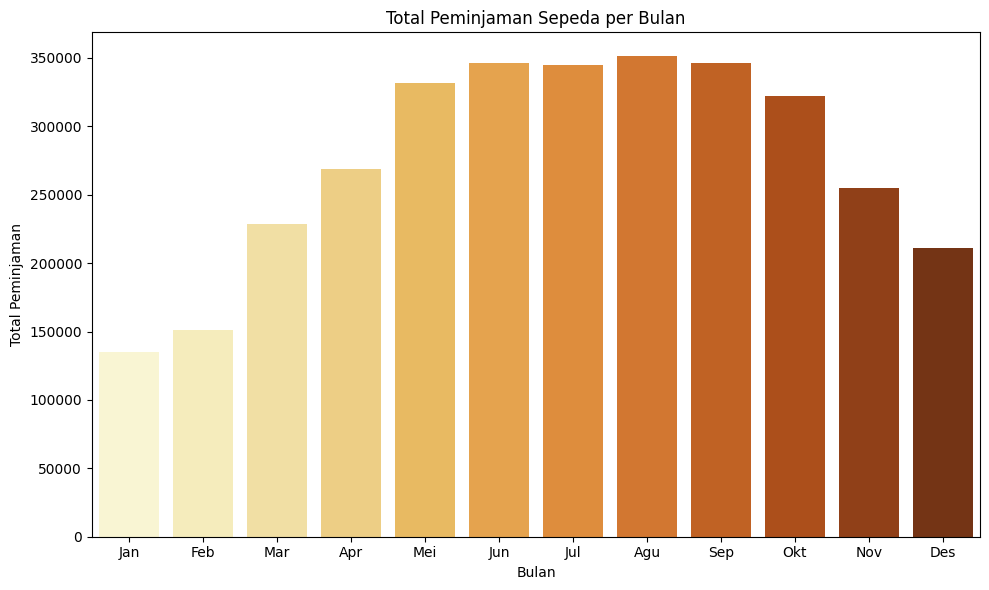

In [ ]:
new_color = sns.color_palette("YlOrBr", n_colors=12)

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_rentals.index,
            y=monthly_rentals.values,
            palette=new_color)

plt.title("Total Peminjaman Sepeda per Bulan")
plt.xlabel("Bulan", fontsize=10)
plt.ylabel("Total Peminjaman", fontsize=10)

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun',
               'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(range(12), month_names, rotation=0)

plt.tight_layout()
plt.show()

###Insight 1
> Berdasarkan grafik diatas, dapat dilhat bahwa pola peminjaman sepeda dalam sebulan mengalami di bulan-bulan pertengah tahun, yaitu bulan Juni, Juli, Agustus, dan September walaupun tren peningkatan ini tidak berlanjut dan mengalami penurunan pada bulan-bulan berikutnya

###Bagaimana rata-rata peminjaman sepeda per hari dalam sebulan?

In [ ]:
day_of_month_avg_rentals = day_hour_df.groupby(day_hour_df['dteday'].dt.day)['cnt'].mean()
day_of_month_avg_rentals

,cnt
dteday,
1,180.333913
2,183.910995
3,194.696335
4,195.705575
5,189.765217
6,189.860140
7,183.773519
8,179.041812
9,187.897391


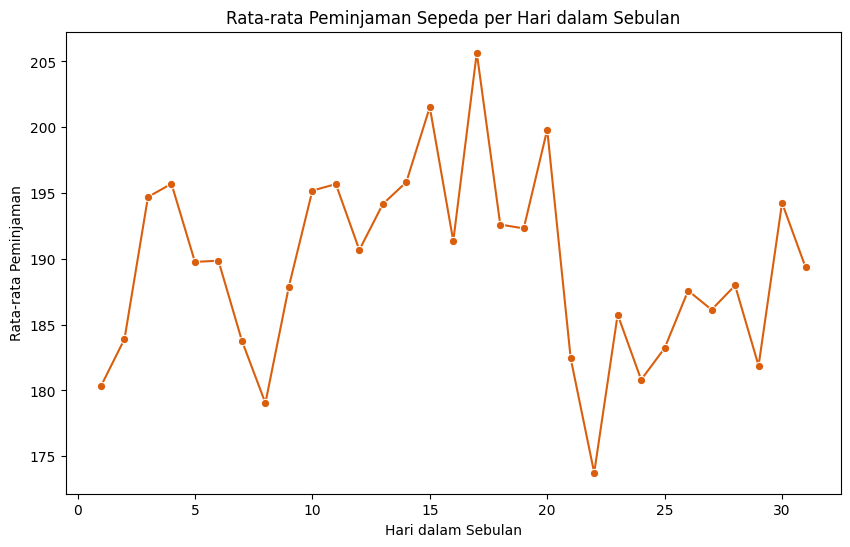

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_of_month_avg_rentals.index, y=day_of_month_avg_rentals.values, marker='o', color="#d95f0e")
plt.title("Rata-rata Peminjaman Sepeda per Hari dalam Sebulan")
plt.xlabel("Hari dalam Sebulan")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

###Insight 2

> Jumlah peminjaman sepeda dari hasil analisis, berubah cukup drastis dari satu hari ke hari berikutnya. Terdapat beberapa hari di mana jumlah peminjaman mencapai puncak dan beberapa hari lainnya di mana jumlah peminjaman sangat rendah.



###Bagaimana rata-rata total peminjaman sepeda berdasarkan Cuaca?

In [ ]:
weathersit_avg_rentals = day_hour_df.groupby('weathersit')['cnt'].mean()
weathersit_avg_rentals

,cnt
weathersit,
Clear,204.869272
Heavy Rain,74.333333
Light Snow,111.579281
Mist + Cloudy,175.165493


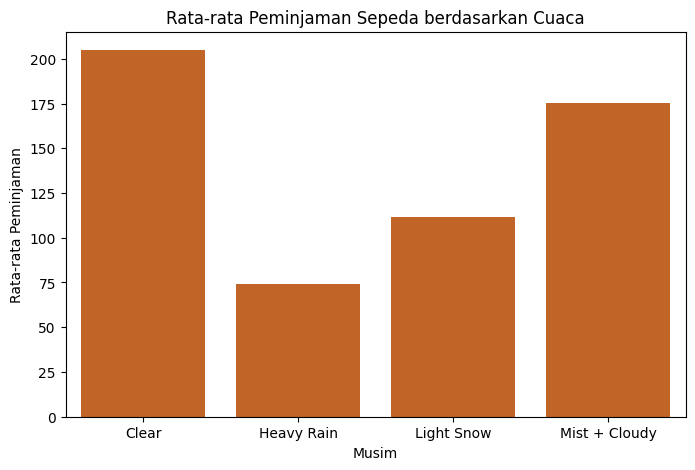

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=weathersit_avg_rentals.index, y=weathersit_avg_rentals.values, color="#d95f0e")
plt.title("Rata-rata Peminjaman Sepeda berdasarkan Cuaca")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Peminjaman")
plt.show()

###Insight 3
>Dapat dilihat bahwa  kondisi cuaca cerah (Clear) menjadi faktor dominan pada data peminjaman sepeda. Cuaca berkabut + berawan (Mist Cloud) menempati urutan kedua, diikuti oleh cuaca bersalju ringan (Light Snow). Sebaliknya, cuaca hujan deras (Heavy Rain) terbukti kurang menarik bagi pengguna sepeda

###Bagaimana rata-rata peminjaman sepeda setiap hari dalam seminggu?

In [ ]:
weekday_avg_rentals = day_hour_df.groupby('weekday')['cnt'].mean()
weekday_avg_rentals

,cnt
weekday,
0,177.468825
1,183.744655
2,191.238891
3,191.130505
4,196.436665
5,196.135907
6,190.209793


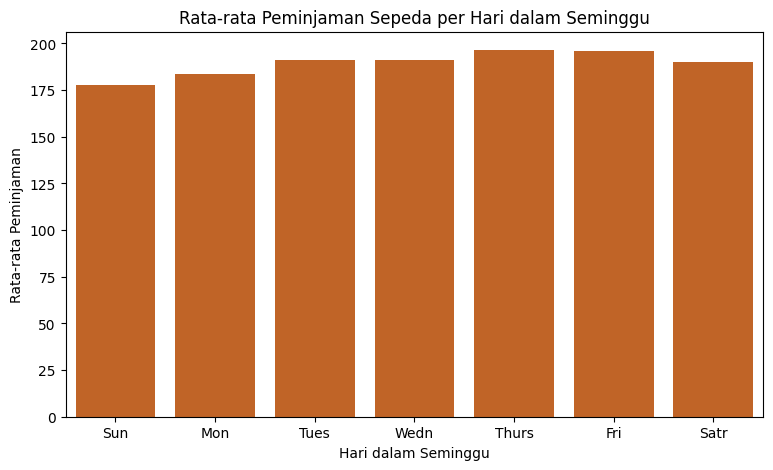

In [ ]:
plt.figure(figsize=(9, 5))
sns.barplot(x=weekday_avg_rentals.index,
            y=weekday_avg_rentals.values,
            color="#d95f0e")
plt.title("Rata-rata Peminjaman Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu", fontsize=10)
plt.ylabel("Rata-rata Peminjaman")

weekdays_names = ['Sun', 'Mon', 'Tues', 'Wedn', 'Thurs', 'Fri', 'Satr']
plt.xticks(range(7), weekdays_names, rotation=0)
plt.show()

###Insight 4
>Grafik menunjukkan bahwa rata-rata peminjaman sepeda per hari cenderung stabil sepanjang minggu. Tidak ada perbedaan yang signifikan antara hari Senin sampai Sabtu.

###Bagaimana perbedaan antar peminjam sepeda di Hari Kerja VS Akhir Pekan?

In [ ]:
workingday_rentals = day_hour_df.groupby('workingday')['cnt'].sum()
workingday_rentals

,cnt
workingday,
0,1000269
1,2292410


<ipython-input-43-fe83607893e0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=workingday_rentals.index, y=workingday_rentals.values, palette=colors)


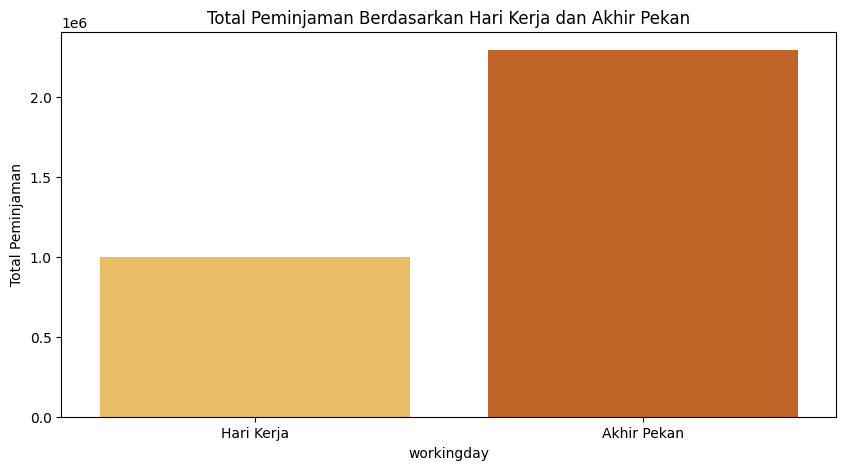

In [ ]:
plt.figure(figsize=(10, 5))
colors = ["#fec44f", "#d95f0e"]
sns.barplot(x=workingday_rentals.index, y=workingday_rentals.values, palette=colors)

plt.title("Total Peminjaman Berdasarkan Hari Kerja dan Akhir Pekan")
plt.ylabel("Total Peminjaman")
plt.xticks(range(2), ["Hari Kerja", "Akhir Pekan"], rotation=0)

plt.show()

###Insight 5
>Terdapat perbedaan yang signifikan antara jumlah peminjaman sepeda di hari kerja dan akhir pekan. Jumlah peminjaman sepeda di akhir pekan jauh lebih tinggi dibandingkan dengan hari kerja

##RFM Analysis

In [ ]:
day_hour_df['dteday'] = pd.to_datetime(day_hour_df['dteday'])
reference_date = day_hour_df['dteday'].max()

In [ ]:
rfm = day_hour_df.groupby('registered').agg(
    recency=('dteday', lambda x: (reference_date - x.max()).days),
    frequency=('cnt', 'count'),
    monetary=('cnt', 'sum')
).reset_index()

In [ ]:
rfm['recency_score'] = pd.qcut(rfm['recency'], q=4, labels=range(4, 0, -1))
rfm['frequency_score'] = pd.qcut(rfm['frequency'], q=4, labels=range(1, 5))
rfm['monetary_score'] = pd.qcut(rfm['monetary'], q=4, labels=range(1, 5))

In [ ]:
# Hitung RFM Score
rfm['rfm_score'] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str) +
                    rfm['monetary_score'].astype(str))

In [ ]:
# Segmentasi pelanggan
segment_conditions = [
    (rfm['recency_score'] >= 4) & (rfm['frequency_score'] >= 4) & (rfm['monetary_score'] >= 4),
    (rfm['recency_score'] >= 3) & (rfm['frequency_score'] >= 3) & (rfm['monetary_score'] >= 3),
    (rfm['recency_score'] >= 3) & (rfm['frequency_score'] >= 1) & (rfm['monetary_score'] >= 2),
    (rfm['recency_score'] >= 2) & (rfm['frequency_score'] >= 2) & (rfm['monetary_score'] >= 2),
    (rfm['recency_score'] >= 2) & (rfm['frequency_score'] >= 1) & (rfm['monetary_score'] >= 1)
]

segment_labels = [
    'Best Customers',
    'Loyal Customers',
    'Active Customers',
    'Regular Customers',
    'Occasional Customers'
]

rfm['customer_segment'] = np.select(segment_conditions, segment_labels, default='Lost Customers')

In [ ]:
# Tampilkan hasil analisis
print("\nRFM Analysis Results:")
print("\nCustomer Segments Distribution:")
print(rfm['customer_segment'].value_counts())

# Tampilkan statistik deskriptif untuk setiap segmen
print("\nSegment Statistics:")
segment_stats = rfm.groupby('customer_segment').agg({
    'recency': ['mean', 'min', 'max'],
    'frequency': ['mean', 'min', 'max'],
    'monetary': ['mean', 'min', 'max']
}).round(2)

print(segment_stats)


RFM Analysis Results:

Customer Segments Distribution:
customer_segment
Active Customers        207
Occasional Customers    167
Lost Customers          157
Loyal Customers         156
Best Customers           89
Name: count, dtype: int64

Segment Statistics:
                     recency          frequency          monetary             
                        mean min  max      mean min  max     mean   min    max
customer_segment                                                              
Active Customers       91.62  16  308      6.20   2   73  2975.18  1733   4922
Best Customers         17.47   0  105     48.13  37   75  8903.75  6370  12095
Lost Customers          8.98   0   45     51.72   1  307  4237.97    35  11226
Loyal Customers        43.35  16  172     21.99  10   58  6637.44  3401  11749
Occasional Customers  153.98  46  594      1.57   1    3  1099.28   517   1727


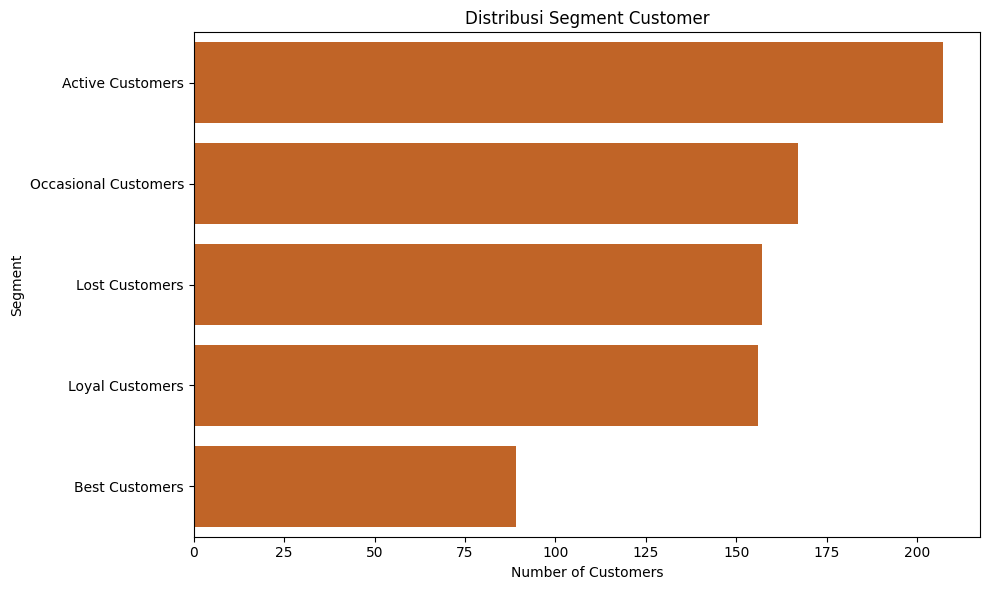

In [ ]:
plt.figure(figsize=(10, 6))
segment_counts = rfm['customer_segment'].value_counts()
sns.barplot(y=segment_counts.index, x=segment_counts.values, color="#d95f0e", orient='h')

plt.title('Distribusi Segment Customer')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.tight_layout()
plt.show()

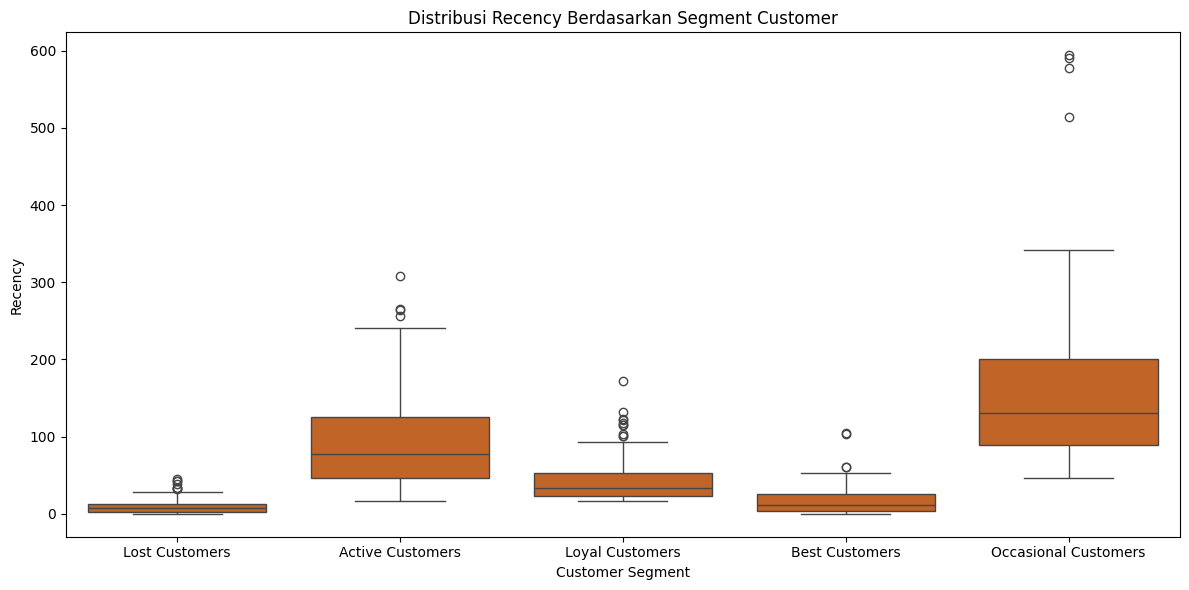

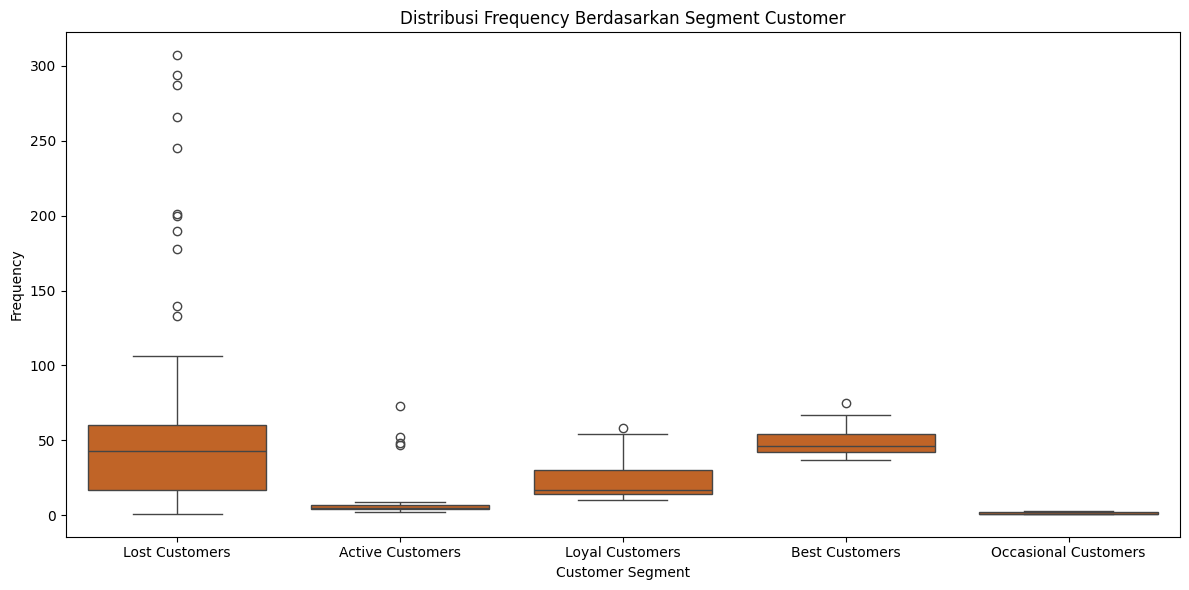

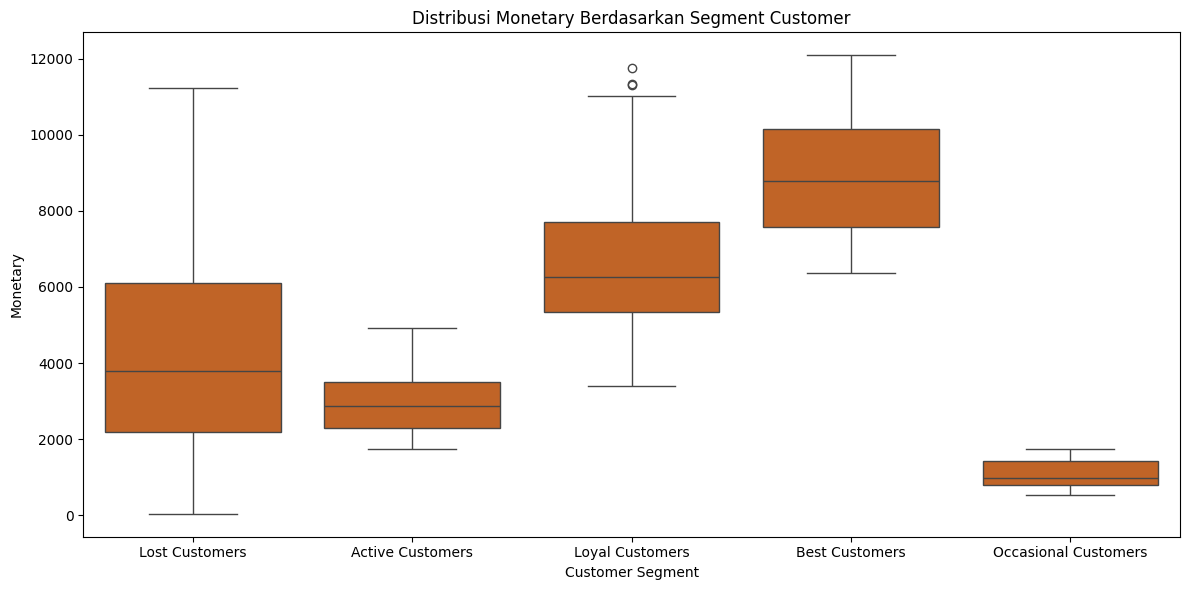

In [ ]:
metrics = ['recency', 'frequency', 'monetary']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=rfm, x='customer_segment', y=metric, color ="#d95f0e")
    plt.title(f'Distribusi {metric.capitalize()} Berdasarkan Segment Customer')
    plt.xlabel('Customer Segment')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

##Ekspor Dataset

In [ ]:
day_hour_df.to_csv("final_dayhour.csv", index=False)